<a href="https://colab.research.google.com/github/agustinelson/natural-language-processing-ML-Project/blob/main/NLP_Sentimient_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS DE SENTIMIENTOS

## Resumen

El objetivo de este proyecto es proponer y evaluar un modelo de análisis de sentimientos basado en redes neuronales recurrentes (RNN) que implementa la arquitectura ResNET utilizando la biblioteca TensorFlow. La combinación de estas técnicas tiene como objetivo mejorar el rendimiento del modelo en la clasificación de sentimientos en comparación con enfoques tradicionales.

**Nota**

Descargar el dataset de aquí:
https://github.com/agustinelson/natural-language-processing-ML-Project/tree/main/data


**Recopilación de datos**

Se recopilará un conjunto de datos etiquetados que contenga ejemplos de texto con sus respectivos sentimientos asociados.

https://github.com/agustinelson/natural-language-processing-ML-Project/blob/main/data/train.txt

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("data/train.txt",
                         sep=";",
                         names=["comment", "label"])
train_data

,comment,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [3]:
test_data = pd.read_csv("data/test.txt",
                         sep=";",
                         names=["comment", "label"])
test_data

,comment,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [4]:
valid_data = pd.read_csv("data/val.txt",
                         sep=";",
                         names=["comment", "label"])
valid_data

,comment,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


**Preprocesamiento de datos**

Se recopilará un conjunto de datos etiquetados que contenga ejemplos de texto con sus respectivos sentimientos asociados (positivo, negativo o neutro). Luego, se realizará el preprocesamiento de datos, que incluirá la eliminación de signos de puntuación, la tokenización, la eliminación de palabras irrelevantes y la normalización del texto.

In [5]:
train_data.label.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

**Codificación de texto**

In [6]:
code_sentimients = {'joy'     : 0,
                    'sadness' : 1,
                    'anger'   : 2,
                    'fear'    : 3,
                    'love'    : 4,
                    'surprise': 5}

In [7]:
train_data['label code']= train_data.label.map(code_sentimients)
train_data

,comment,label,label code
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1
15996,i am now turning and i feel pathetic that i am...,sadness,1
15997,i feel strong and good overall,joy,0
15998,i feel like this was such a rude comment and i...,anger,2


In [8]:
test_data['label code']= test_data.label.map(code_sentimients)
test_data

,comment,label,label code
0,im feeling rather rotten so im not very ambiti...,sadness,1
1,im updating my blog because i feel shitty,sadness,1
2,i never make her separate from me because i do...,sadness,1
3,i left with my bouquet of red and yellow tulip...,joy,0
4,i was feeling a little vain when i did this one,sadness,1
...,...,...,...
1995,i just keep feeling like someone is being unki...,anger,2
1996,im feeling a little cranky negative after this...,anger,2
1997,i feel that i am useful to my people and that ...,joy,0
1998,im feeling more comfortable with derby i feel ...,joy,0


In [9]:
valid_data['label code']= valid_data.label.map(code_sentimients)
valid_data

,comment,label,label code
0,im feeling quite sad and sorry for myself but ...,sadness,1
1,i feel like i am still looking at a blank canv...,sadness,1
2,i feel like a faithful servant,love,4
3,i am just feeling cranky and blue,anger,2
4,i can have for a treat or if i am feeling festive,joy,0
...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,1
1996,i constantly worry about their fight against n...,joy,0
1997,i feel its important to share this info for th...,joy,0
1998,i truly feel that if you are passionate enough...,joy,0


**Representación de características**

Los datos preprocesados se convertirán en representaciones numéricas adecuadas para su entrada en el modelo de RNN. Se puede utilizar la técnica de "Bag of Words" (BoW) o TF-IDF para convertir los textos en vectores numéricos.

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def lematize(comment):
    tokens = []
    for token in nlp(comment):
        if not token.is_space and not token.is_punct:
            tokens.append(token.lemma_)
    return ' '.join(tokens)

In [11]:
lematize("hi mom, how are you?")

'hi mom how be you'

In [12]:
df_train = pd.DataFrame()

In [13]:
df_train["comment_lema"] = train_data.comment.apply(lematize)

In [14]:
df_train["label"] = train_data["label code"]

In [15]:
df_train

,comment_lema,label
0,I do not feel humiliate,1
1,I can go from feel so hopeless to so damned ho...,1
2,I m grab a minute to post I feel greedy wrong,2
3,I be ever feel nostalgic about the fireplace I...,4
4,I be feel grouchy,2
...,...,...
15995,I just have a very brief time in the beanbag a...,1
15996,I be now turn and I feel pathetic that I be st...,1
15997,I feel strong and good overall,0
15998,I feel like this be such a rude comment and I ...,2


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()

In [19]:
input_train = tfidf.fit_transform(df_train["comment_lema"][:20]).toarray()

1.6899620766735213


**Construcción del modelo de RNN**

Se implementará una arquitectura de redes neuronales recurrentes utilizando la biblioteca TensorFlow. Esto puede incluir capas de embedding para convertir las representaciones numéricas de las palabras en vectores densos, seguidas de capas LSTM (Long Short-Term Memory) para capturar la información de contexto a largo plazo. La arquitectura específica de la RNN, incluyendo el número de capas, el tamaño de los vectores de embedding y las unidades LSTM, se determinará experimentalmente o mediante técnicas de ajuste de hiperparámetros.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
# Transformar los datos de entrenamiento y prueba
X = input_train
Y = df_train["label"][:20]

In [28]:
print(X,"\n\n", len(X))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.4271339  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.19657724 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

 20


In [29]:
print(Y,"\n\n", len(Y))

0     1
1     1
2     2
3     4
4     2
5     1
6     5
7     3
8     0
9     4
10    1
11    0
12    2
13    1
14    0
15    0
16    1
17    1
18    1
19    3
Name: label, dtype: int64 

 20


In [30]:
# Crear el modelo RNN
model = Sequential()
model.add(Embedding(input_dim=len(tfidf.vocabulary_), output_dim=100, input_length=len(X[0])))
model.add(SimpleRNN(units=32))
model.add(Dense(units=7, activation='softmax'))  # Cambio en el número de unidades y la activación

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Cambio en la función de pérdida

# Entrenar el modelo
model.fit(X, Y, epochs=1, batch_size=32)

# Realizar predicciones
#predictions = model.predict(X_test_sequences)


1/1 [==============================] - 7s 7s/step - loss: 2.1750 - accuracy: 0.2000


In [31]:
from tensorflow.keras.utils import plot_model

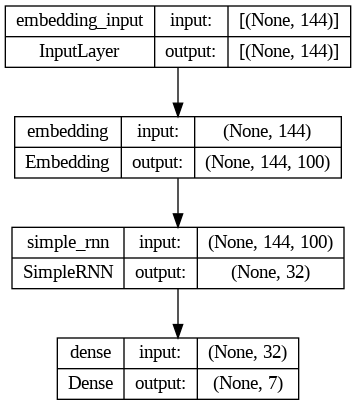

In [32]:
plot_model(model, to_file='rnn_model.png', show_shapes=True)

**Evaluación del modelo**

 Una vez finalizado el entrenamiento, se evaluará el modelo utilizando el conjunto de prueba. Se calcularán métricas de evaluación, como precisión, recuerdo y puntuación F1, para medir el rendimiento del modelo en la clasificación de sentimientos.

**Uso del modelo en nuevos datos** 

Una vez que el modelo esté entrenado y evaluado, se podrá utilizar para predecir los sentimientos en nuevos textos no etiquetados. Estos textos podrían ser comentarios de usuarios en redes sociales, reseñas de productos o cualquier otro tipo de texto en el que se desee realizar análisis de sentimientos.